# Esercitazione 9

**29 Aprile 2024**

*Gradiente e gradiente coniugato*

In [12]:
import scipy as sp
import numpy as np
import numpy.linalg as npl
import scipy.linalg as scl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Esercizio 1
Implementare la funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [3]:
def steepestdescent(A: np.matrix, b, x0, itmax, tol):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return None,None,None,None
    
    x = x0
    # calcolo il residuo
    r = A @ x - b
    # la prima direzione è -r
    p = -r
    it = 0

    # voglio che il valore calcolato Ax - b sia il piu' vicino possibile al valore esatto b
    nb = npl.norm(b, 2)
    criterio_arresto = npl.norm(r, 2) / nb

    vec_sol = [x]
    vec_r = [criterio_arresto]

    while it < itmax and criterio_arresto >= tol:
        it += 1

        # ricalcolo alfa <r, p> / <Ap, p>
        Ap = A @ p
        alfa = - (r.T @ p) / (p.T @ Ap)

        # ricalcolo la soluzione
        x = x + alfa * p
        vec_sol.append(x)
        
        # ricalcolo la direzione
        r = r + alfa * Ap
        p = -r

        # ricalcolo il criterio di arresto
        criterio_arresto = npl.norm(r, 2) / nb
        vec_r.append(criterio_arresto)


    return x, vec_r, vec_sol, it


In [5]:
A = np.array([
    [8, 4],
    [4, 3]
])
b = np.array([[8], [10]])
x0 = np.zeros_like(b)

it_max = 200
tol = 1e-10

xG, vec_rG, vec_solG, itG = steepestdescent(A, b, x0, it_max, tol)


Soluzione: [[-2.]
 [ 6.]]
Iterazioni: 200


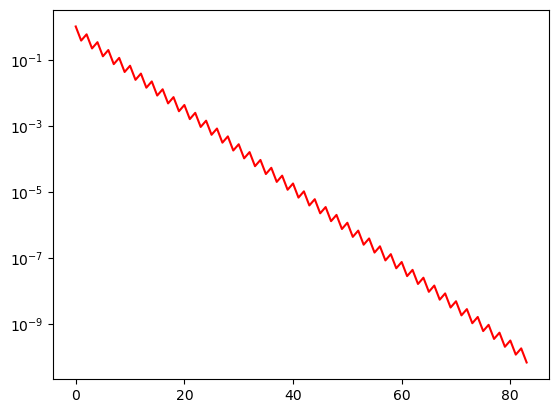

In [8]:
print("Soluzione:", xG)
print("Iterazioni:", itG)
plt.semilogy(np.arange(itG + 1), vec_rG, '-r')

## Esercizio 1-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= 1/2 <Ax,x> - <b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

In [15]:
def f(x, A: np.matrix, b):
    Ax = A @ x
    return 0.5 * (x.T @ Ax) - (b.T @ x)

In [53]:
def steepestdescent_CL(A: np.matrix, b, x0, itmax, X, Y, Z, f, tol):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return None,None,None,None
    
    x = x0
    
    # draw lvl lines
    plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
    plt.plot(x[0], x[1], 'ro') 

    # calcolo il residuo
    r = A @ x - b
    # la prima direzione è -r
    p = -r
    it = 0

    # voglio che il valore calcolato Ax - b sia il piu' vicino possibile al valore esatto b
    nb = npl.norm(b, 2)
    criterio_arresto = npl.norm(r, 2) / nb

    vec_sol = [x]
    vec_r = [criterio_arresto]

    while it < itmax and criterio_arresto >= tol:
        it += 1

        # ricalcolo alfa <r, p> / <Ap, p>
        Ap = A @ p
        alfa = - (r.T @ p) / (p.T @ Ap)

        # ricalcolo la soluzione
        x = x + alfa * p
        vec_sol.append(x)

        # draw lvl lines
        plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
        plt.plot(x[0], x[1], 'ro')
        
        # ricalcolo la direzione
        r = r + alfa * Ap
        p = -r

        # ricalcolo il criterio di arresto
        criterio_arresto = npl.norm(r, 2) / nb
        vec_r.append(criterio_arresto)


    return x, vec_r, vec_sol, it


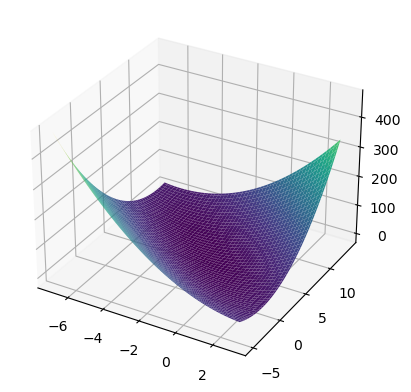

In [54]:
x = np.linspace(-7.0, 3.0, 100)
y = np.linspace(-5.0, 14.0, 100)
X,Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(len(y)):
    for j in range(len(x)):
        x_coord = X[i][j]
        y_coord = Y[i][j]
        
        Z[i][j] = f(np.array([[x_coord], [y_coord]]), A, b)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)
plt.show()

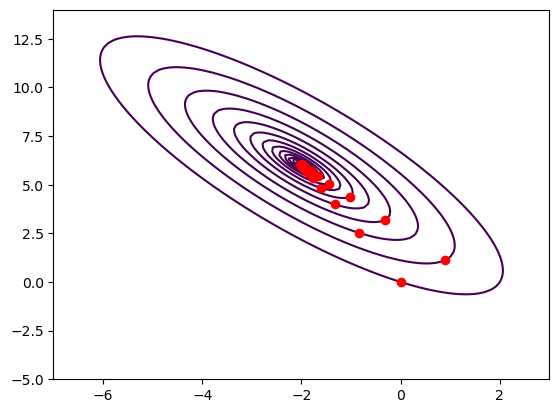

In [55]:
A = np.array([
    [8, 4],
    [4, 3]
])
b = np.array([[8], [10]])
x0 = np.zeros_like(b)

it_max = 200
tol = 1e-10

xG, vec_rG, vec_solG, itG = steepestdescent_CL(A, b, x0, it_max, X, Y, Z, f, tol)

## Esercizio 2
Implementare la funzione **conjugate_gradient(A,b,x0,itmax,tol)** che implementa il metodo del gradiente coniugato per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione
- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [50]:
def conjugate_gradient(A: np.matrix, b, x0, itmax, tol):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return None,None,None,None
    
    x = x0
    # calcolo il residuo
    r = A @ x - b
    rk = r
    # la prima direzione è -r
    p = -r
    it = 0

    # voglio che il valore calcolato Ax - b sia il piu' vicino possibile al valore esatto b
    nb = npl.norm(b, 2)
    criterio_arresto = npl.norm(r, 2) / nb

    vec_sol = [x]
    vec_arr = [criterio_arresto]

    while it < itmax and criterio_arresto >= tol:
        it += 1

        # ricalcolo alfa <r, p> / <Ap, p>
        Ap = A @ p
        alfa = - (r.T @ p) / (p.T @ Ap)

        # ricalcolo la soluzione
        x = x + alfa * p
        vec_sol.append(x)
        
        # ricalcolo il residuo e direzione
        r = r + alfa * Ap
        gamma = (r.T @ r) / (rk.T @ rk)
        p = - r + gamma * p
        rk = r

        # ricalcolo il criterio di arresto
        criterio_arresto = npl.norm(r, 2) / nb
        vec_arr.append(criterio_arresto)

    return x, vec_arr, vec_sol, it


In [51]:
A = np.array([
    [8, 4],
    [4, 3]
])
b = np.array([[8], [10]])
x0 = np.zeros_like(b)

it_max = 200
tol = 1e-10

xG, vec_rG, vec_solG, itG = conjugate_gradient(A, b, x0, it_max, tol)

Soluzione: [[-2.]
 [ 6.]]
Iterazioni: 200


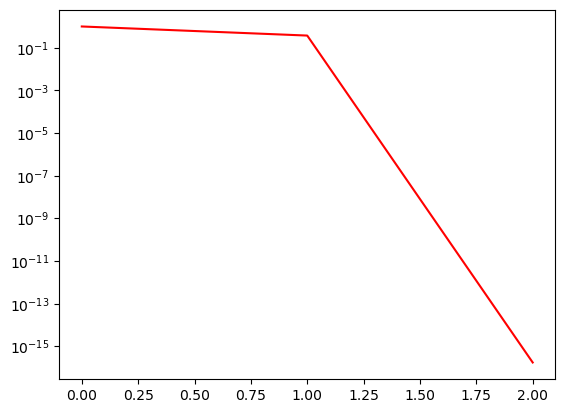

In [52]:
print("Soluzione:", xG)
print("Iterazioni:", itG)
plt.semilogy(np.arange(itG + 1), vec_rG, '-r')

## Esercizio 2-Bis
Implementare la funzione **conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k

In [56]:
def conjugate_gradient_CL(A: np.matrix, b, x0, itmax, X, Y, Z, f, tol):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return None,None,None,None
    
    x = x0
    
    # draw lvl lines
    plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
    plt.plot(x[0], x[1], 'ro') 

    # calcolo il residuo
    r = A @ x - b
    rk = r
    # la prima direzione è -r
    p = -r
    it = 0

    # voglio che il valore calcolato Ax - b sia il piu' vicino possibile al valore esatto b
    nb = npl.norm(b, 2)
    criterio_arresto = npl.norm(r, 2) / nb

    vec_sol = [x]
    vec_r = [criterio_arresto]

    while it < itmax and criterio_arresto >= tol:
        it += 1

        # ricalcolo alfa <r, p> / <Ap, p>
        Ap = A @ p
        alfa = - (r.T @ p) / (p.T @ Ap)

        # ricalcolo la soluzione
        x = x + alfa * p
        vec_sol.append(x)

        # draw lvl lines
        plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
        plt.plot(x[0], x[1], 'ro')
        
        # ricalcolo il residuo e direzione
        r = r + alfa * Ap
        gamma = (r.T @ r) / (rk.T @ rk)
        p = - r + gamma * p
        rk = r

        # ricalcolo il criterio di arresto
        criterio_arresto = npl.norm(r, 2) / nb
        vec_r.append(criterio_arresto)


    return x, vec_r, vec_sol, it


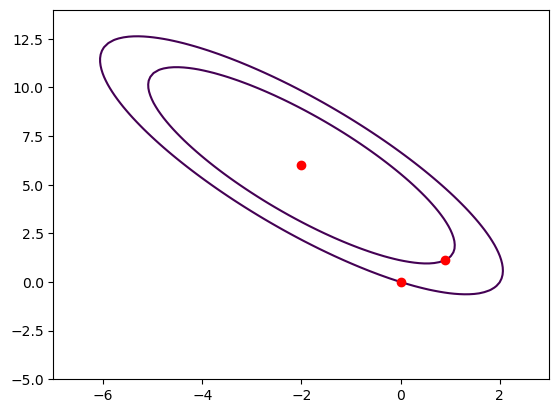

In [58]:
A = np.array([
    [8, 4],
    [4, 3]
])
b = np.array([[8], [10]])
x0 = np.zeros_like(b)

it_max = 200
tol = 1e-10

xG, vec_rG, vec_solG, itG = conjugate_gradient_CL(A, b, x0, it_max, X, Y, Z, f, tol)

## Test didattici per il caso n=2, visualizzando le curve di livello

Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando
il metodo del gradiente e del gradiente coniugato con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. Si selezioni l'iterato iniziale x0=[0,0], itmax=200
tol=1e-10. Si confrontino le iterazioni effettuate da ciascuno dei due metodi e si visualizzi  $ \frac{||r^{(k)}||_2} {||b||_2}$ ad ogni iterazione.

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi